In [75]:
import os
import psutil
import Reverse_Delete_Algorithm
import Alternating_colored_edges
import matplotlib.pyplot as plt 
import time 
import numpy as np
%matplotlib inline

In [76]:
def systemDetails():
    Data = []
    pid = os.getpid()
    py = psutil.Process(pid)
    
    print("System-Level Information: \n")

    cpuTime = psutil.cpu_times_percent(interval=1, percpu=False)
    print("CPU Usage: ", cpuTime, "\n")  # 1
    Data.append(cpuTime)

    memory_usage = py.memory_percent()
    print("Memory Usage: ", memory_usage, " \n")  # 2
    Data.append(memory_usage)

    hardDisk = psutil.disk_usage('/')
    print("Hard Drive Usage:")
    print("Total: ", hardDisk.total / (2 ** 30), "GB, Used: ", hardDisk.used / (2 ** 30), "GB, Free: ", hardDisk.free / (2 ** 30),
      "GB ")  # 3
    Data.append(hardDisk)

    memory_info = py.memory_info()
    rss = memory_info[0] / 2. ** 30
    print("RSS (Resident set size): ", rss, "GB ")  # 4
    Data.append(rss)

    vms = memory_info[1] / 2. ** 30
    print("VMS (Virtual memory size): ", vms, "GB ")  # 5
    Data.append(vms)

    pf = memory_info[2]
    print("No. of Page faults: ", pf, "\n")  # 6
    Data.append(pf)



In [77]:
def userInformation(start,end,return_='false'):
    if(return_ == 'false'):
        print("User-Level Information: \n")
        print("Execution time :",(end - start),end=" Seconds\n\n\n")
    elif(return_== 'true'):
        return float(end - start)
    

In [78]:


start_time = time.time()
os.system('python Alternating_colored_edges.py')
#%run -i "C:\Users\karis\Desktop\Spring 2020\Advanced Operating Systems Design\Assignments\2) Project\Alternating_colored_edges"
end_time = time.time()
userInformation(start_time,end_time)
systemDetails()


User-Level Information: 

Execution time : 0.6810088157653809 Seconds


System-Level Information: 

CPU Usage:  scputimes(user=8.6, system=2.7, idle=88.3, interrupt=0.4, dpc=0.0) 

Memory Usage:  1.120042458747467  

Hard Drive Usage:
Total:  223.41480255126953 GB, Used:  212.7821502685547 GB, Free:  10.632652282714844 GB 
RSS (Resident set size):  0.08855438232421875 GB 
VMS (Virtual memory size):  0.20307159423828125 GB 
No. of Page faults:  250022 



In [79]:
start_time1 = time.time()
os.system('python Reverse_Delete_Algorithm.py ')
#%run -i "C:\Users\karis\Desktop\Spring 2020\Advanced Operating Systems Design\Assignments\2) Project\Reverse_Delete_Algorithm"
end_time1 = time.time()
userInformation(start_time1,end_time1)
systemDetails()

User-Level Information: 

Execution time : 0.15970993041992188 Seconds


System-Level Information: 

CPU Usage:  scputimes(user=5.1, system=1.2, idle=93.4, interrupt=0.4, dpc=0.0) 

Memory Usage:  1.1201389559008008  

Hard Drive Usage:
Total:  223.41480255126953 GB, Used:  212.7821502685547 GB, Free:  10.632652282714844 GB 
RSS (Resident set size):  0.08856201171875 GB 
VMS (Virtual memory size):  0.20307159423828125 GB 
No. of Page faults:  250024 



In [80]:
start_time2 = time.time()
os.system('python Alternating_colored_edges.py && python Reverse_Delete_Algorithm.py')
end_time2 = time.time()

#os.system('python '+str(Alternating_colored_edges)+' && python '+str(Reverse_Delete_Algorithm))
userInformation(start_time2,end_time2)
systemDetails()

User-Level Information: 

Execution time : 0.7875571250915527 Seconds


System-Level Information: 

CPU Usage:  scputimes(user=6.2, system=11.6, idle=81.4, interrupt=0.4, dpc=0.4) 

Memory Usage:  1.1201389559008008  

Hard Drive Usage:
Total:  223.41480255126953 GB, Used:  212.7821502685547 GB, Free:  10.632652282714844 GB 
RSS (Resident set size):  0.08856201171875 GB 
VMS (Virtual memory size):  0.20307159423828125 GB 
No. of Page faults:  250024 



Text(0, 0.5, 'Execution Time (in Seconds)')

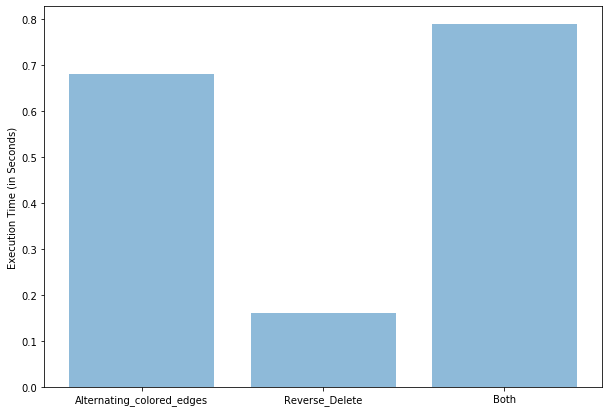

In [81]:
objects = ('Alternating_colored_edges', 'Reverse_Delete', 'Both')
y_pos = np.arange(len(objects))
performance = [float(userInformation(start_time,end_time,'true')),float(userInformation(start_time1,end_time1,'true')),float(userInformation(start_time2,end_time2,'true'))]
plt.figure(figsize=(10, 7))
plt.bar(y_pos, performance, align='center', alpha=0.5)

plt.xticks(y_pos, objects)
plt.ylabel('Execution Time (in Seconds)')
